In [1]:
# -*-coding:utf-8 -*-
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
tips = sns.load_dataset("tips") #载入自带数据集
pokemon = pd.read_csv('F:\codehub\ipynb\seaborn\csv\pokemon.csv') #载入宝可梦数据集
antV = ["#61a5e8", "#7ecf51", "#eecb5f", "#9570e5", "#e3935d", "#e16757", "#605ff0"] #antV配色

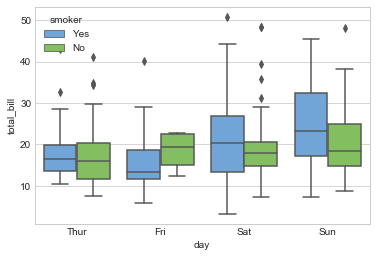

In [2]:
#使用自带数据集试绘箱线图
#研究三个变量之间的关系,是否抽烟与日期为分类变量,消费是连续变量
#结论发现吸烟者在周末消费明显大于不吸烟的人
with sns.color_palette(antV):
    ax = sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips)

In [3]:
#打印宝可梦数据集前六列
#各列分别为：名称,第一属性,第二属性,总数,血量,攻击,防御,特殊攻击,特殊防御,速度,代数,传奇
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


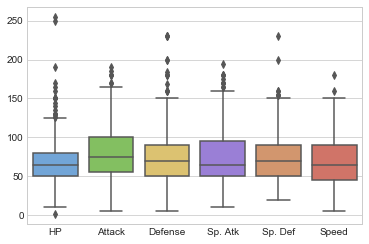

In [4]:
#使用箱线图观察各属性的分布
pkmn = pokemon.drop(['Total', '#','Generation','Legendary'],1);
with sns.color_palette(antV):
    sns.boxplot(data=pkmn);

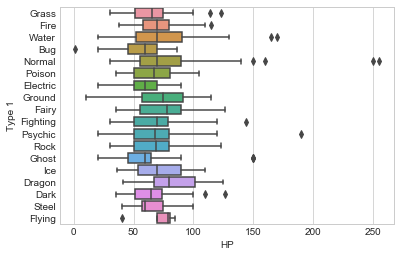

In [5]:
#使用箱线图观察第一属性与HP值/speed速度分布关系
sns.boxplot(y='Type 1',x='HP',data=pokemon)

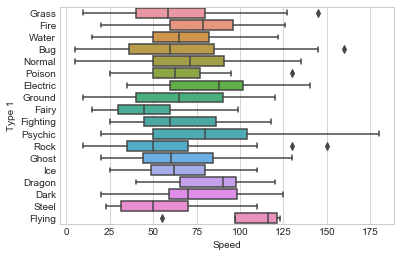

In [6]:
sns.boxplot(y='Type 1',x='Speed',data=pokemon)

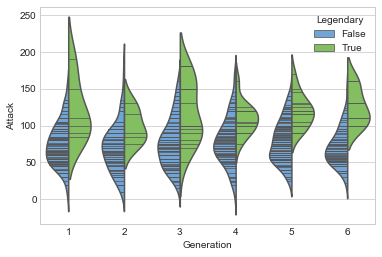

In [7]:
#以速度为y轴，世代为x轴，区分"传奇",来绘制攻击能力的琴形图
#由于传奇系很稀少，scale选择width，保持两边宽度相同，inder选择stick加入分布竖条
with sns.color_palette(antV):
    sns.violinplot(y='Attack', x='Generation', data=pokemon, hue='Legendary', split=True, 
                   scale="width", inner="stick", scale_hue=False)

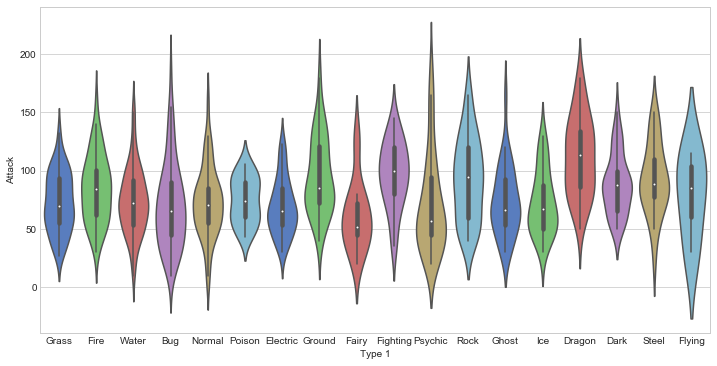

In [8]:
#继续通过琴形图观察，攻击与防御分布如何
plt.figure(figsize=(12, 6)) #由于变量过多，调整下图表大小
ax1 = sns.violinplot(x="Type 1", y="Attack", data=pokemon, scale="width", palette="muted")

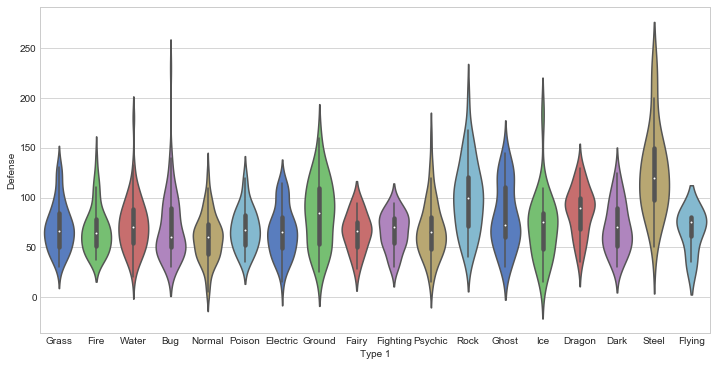

In [9]:
plt.figure(figsize=(12, 6))
ax1 = sns.violinplot(x="Type 1", y="Defense", data=pokemon, scale="width", palette="muted")

In [10]:
#观察皮卡丘属性
pokemon[pokemon['Name']=='Pikachu']

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


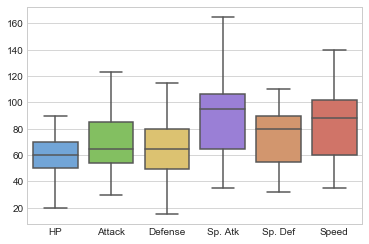

In [11]:
#观察电属性生物的情况
with sns.color_palette(antV):
    sns.boxplot(data=pkmn[pkmn['Type 1']=='Electric'])

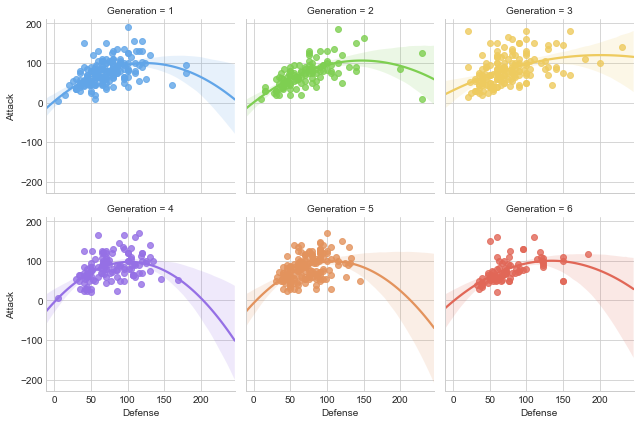

In [12]:
#利用lmplot研究攻击与防御的关系
with sns.color_palette(antV):
    sns.lmplot(x="Defense", y="Attack",data=pokemon,col="Generation", 
               hue="Generation",col_wrap=3, size=3,order=2)

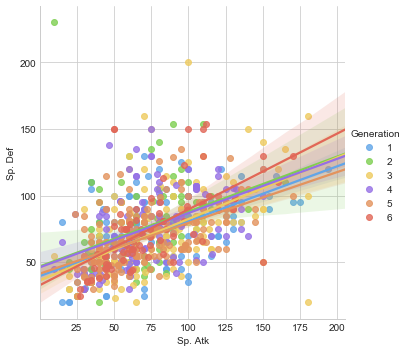

In [13]:
#继续在同一图中观察不同代的sp.Atk,Sp.Def线性关系
with sns.color_palette(antV):
    sns.lmplot(x="Sp. Atk", y="Sp. Def", data=pokemon, hue='Generation', size=5,order=1)